Notes from https://arxiv.org/pdf/2411.11269 [1]

https://arxiv.org/pdf/2411.11269 uses Variable Projection to determine the content of the model rather than least squares. They employ VARPO (https://github.com/sxs-collaboration/varpro) at late times to determine the complex amplitudes and frequencies of very long-lived modes (above the noise floor), then step backwards (fixing the frequencies of known modes at later times)

*Things to consider:

- Neglect contribution to null memory
- Adjust the scale of the time coordinate to match the convention in tabulated values 
- Adding a constant term to the superposition to account for an unknown cpt of the ringdown 

____

Higher overtone number amplitudes become unstable at earlier times, even in the presence of an extremely low noise floor. The effect cascades to lower overtone number in part due to the higher modes becoming unresolvable yet remaining in the model at these times. In other words, including modes in the fit that are no longer present in the data spoils the resolvability of the modes that are still present. To remedy this, we can remove modes at the time they become unresolvable (which in practise happens sequentially from $n=9$ backwards.)
___

In this notebook we don't (yet) account for the above considerations*, nor do we use VARPO. We take the given model determined in [1] and apply it, removing modes when their amplitudes become unstable. 

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfits
import funcs.CCE as CCE
from funcs.likelihood_funcs import * 
from funcs.utils import *
from funcs.kernel_param_funcs import *
from funcs.qnm_selecting_funcs import *
import corner
import scipy
import pickle 

In [88]:
id = "0001"

DT = 0.5

sim_main = CCE.SXS_CCE(id, lev="Lev5", radius="R2")
analysis_times = np.arange(0,  100, DT)
sim_main = sim_interpolator(sim_main, analysis_times)

n_max = 6

T0 = 0
T = 50

threshold_sig = np.log(0.8)

spherical_mode = (2,2)
qnm_list = [(2,2,n,1) for n in np.arange(0, n_max+1)] #+ [(3, 2, 0, 1), (3, 2, 1, 1)] 
spherical_modes = [(2, 2)]

chif_mag_0 = sim_main.chif_mag
Mf_0 = sim_main.Mf

with open('tuned_params.pkl', 'rb') as f:
    tuned_params = pickle.load(f)

In [89]:
# This is just for the white noise kernel because I don't auto generate a file 

with open('param_dict_sim_lm_full.pkl', 'rb') as f:
    param_dict_sim_lm = pickle.load(f)

tuning_hyperparams_s = [0.3996582031249995]  

hyperparam_rule_dict_s = {
    "sigma_max": "multiply",
}

tuned_param_dict_s = {mode: get_new_params(param_dict_sim_lm[id][mode], tuning_hyperparams_s, hyperparam_rule_dict_s) for mode in param_dict_sim_lm[id]}

In [90]:
start_times = np.linspace(T0, T, 100)
qnm_ordering = [(2, 2, n, 1) for n in np.arange(n_max, -1, -1)]

In [91]:
qnm_list_timeseries = get_qnm_timeseries(
    qnm_list,
    spherical_modes,
    start_times,
    sim_main.times,
    sim_main.h,
    Mf_0,
    chif_mag_0,
    tuned_params[id],
    kernel_main,
    T=T,
    threshold_sig=threshold_sig,
    qnm_ordering=qnm_ordering
    )


t0 = 0.0
t0 = 0.5050505050505051
t0 = 1.0101010101010102
t0 = 1.5151515151515151
t0 = 2.0202020202020203
t0 = 2.5252525252525255
t0 = 3.0303030303030303
t0 = 3.5353535353535355
t0 = 4.040404040404041
t0 = 4.545454545454546
t0 = 5.050505050505051
t0 = 5.555555555555556
t0 = 6.0606060606060606
t0 = 6.565656565656566
t0 = 7.070707070707071
(2, 2, 6, 1) removed with significance -0.5131575156346315
t0 = 7.575757575757576
t0 = 8.080808080808081
t0 = 8.585858585858587
(2, 2, 5, 1) removed with significance -0.2827475834750547
t0 = 9.090909090909092
t0 = 9.595959595959597
t0 = 10.101010101010102
t0 = 10.606060606060607
t0 = 11.111111111111112
(2, 2, 4, 1) removed with significance -0.2909622018781765
t0 = 11.616161616161618
t0 = 12.121212121212121
t0 = 12.626262626262626
t0 = 13.131313131313131
t0 = 13.636363636363637
t0 = 14.141414141414142
t0 = 14.646464646464647
t0 = 15.151515151515152
t0 = 15.656565656565657
t0 = 16.161616161616163
t0 = 16.666666666666668
t0 = 17.171717171717173
t0 = 17.6

In [92]:
qnm_list_timeseries_s = get_qnm_timeseries(
    qnm_list,
    spherical_modes,
    start_times,
    sim_main.times,
    sim_main.h,
    Mf_0,
    chif_mag_0,
    tuned_param_dict_s,
    kernel_s,
    T=T,
    threshold_sig=threshold_sig,
    qnm_ordering=qnm_ordering
    )

t0 = 0.0
(2, 2, 6, 1) removed with significance -0.8493084278649683
t0 = 0.5050505050505051
t0 = 1.0101010101010102
(2, 2, 5, 1) removed with significance -0.31674679561508373
t0 = 1.5151515151515151
t0 = 2.0202020202020203


t0 = 2.5252525252525255
t0 = 3.0303030303030303
t0 = 3.5353535353535355
t0 = 4.040404040404041
(2, 2, 4, 1) removed with significance -0.4665325021990129
t0 = 4.545454545454546
t0 = 5.050505050505051
t0 = 5.555555555555556
t0 = 6.0606060606060606
t0 = 6.565656565656566
t0 = 7.070707070707071
t0 = 7.575757575757576
(2, 2, 3, 1) removed with significance -0.3492843322835348
t0 = 8.080808080808081
t0 = 8.585858585858587
t0 = 9.090909090909092
t0 = 9.595959595959597
t0 = 10.101010101010102
t0 = 10.606060606060607
t0 = 11.111111111111112
t0 = 11.616161616161618
t0 = 12.121212121212121
t0 = 12.626262626262626
t0 = 13.131313131313131
(2, 2, 2, 1) removed with significance -0.27721526678175307
t0 = 13.636363636363637
t0 = 14.141414141414142
t0 = 14.646464646464647
t0 = 15.151515151515152
t0 = 15.656565656565657
t0 = 16.161616161616163
t0 = 16.666666666666668
t0 = 17.171717171717173
t0 = 17.67676767676768
t0 = 18.181818181818183
t0 = 18.68686868686869
t0 = 19.191919191919194
t0 = 19.69696969696

In [133]:
# no mode dropping 

amplitude_array_ls = np.zeros((len(start_times), len(qnm_list)), dtype=complex)
amplitude_array_ml = np.zeros((len(start_times), len(qnm_list)), dtype=complex)
amplitude_st_dev_array_ml = np.zeros((len(start_times), len(qnm_list)), dtype=complex)

for i, t0 in enumerate(start_times):

    ls_fit = qnmfits.multimode_ringdown_fit(
        sim_main.times,
        sim_main.h,
        modes=qnm_list,
        Mf=Mf_0,
        chif=chif_mag_0,
        t0=t0,
        T=T,
        spherical_modes = [spherical_mode],
    )

    amplitude_array_ls[i, :] = ls_fit["C"]

    bgp_fit = qnm_BGP_fit(
        sim_main.times,
        sim_main.h,
        qnm_list,
        Mf_0,
        chif_mag_0,
        t0,
        tuned_params[id],
        kernel_main,
        t0_method="geq",
        T=T,
        spherical_modes=[spherical_mode],
        )
    
    bgp_amplitudes = np.zeros(len(qnm_list))
    bgp_st_devs = np.zeros(len(qnm_list))

    for j in range(len(qnm_list)):
        bgp_amplitudes[j] = np.sqrt(bgp_fit["mean"][2*j]**2 + bgp_fit["mean"][2*j+1]**2)
        bgp_st_devs[j] = np.sqrt(bgp_fit["covariance"][2*j, 2*j] + bgp_fit["covariance"][2*j+1, 2*j+1])

    amplitude_array_ml[i, :] = bgp_amplitudes
    amplitude_st_dev_array_ml[i, :] = bgp_st_devs

peak_amplitudes_ls = np.abs(amplitude_array_ls).max(axis=0)
peak_amplitudes_ml = np.abs(amplitude_array_ml).max(axis=0)

omega_list = ls_fit["frequencies"]

In [142]:
print(amplitude_st_dev_array_ml)

[[0.0046242 +0.j 0.0425319 +0.j 0.16161038+0.j 0.31754321+0.j
  0.33944248+0.j 0.17981447+0.j 0.03597732+0.j]
 [0.00504512+0.j 0.05171001+0.j 0.21346066+0.j 0.45540274+0.j
  0.52854066+0.j 0.30384136+0.j 0.06646959+0.j]
 [0.00522256+0.j 0.05370614+0.j 0.21991706+0.j 0.46592531+0.j
  0.53791955+0.j 0.30805782+0.j 0.06717704+0.j]
 [0.00539437+0.j 0.05516236+0.j 0.22341485+0.j 0.46970652+0.j
  0.53952907+0.j 0.30796277+0.j 0.066987  +0.j]
 [0.00558229+0.j 0.05670576+0.j 0.22739913+0.j 0.47498625+0.j
  0.54332579+0.j 0.30929812+0.j 0.06713482+0.j]
 [0.00570585+0.j 0.05721549+0.j 0.22706764+0.j 0.47156594+0.j
  0.5377159 +0.j 0.30556409+0.j 0.06624036+0.j]
 [0.00579739+0.j 0.0574578 +0.j 0.22643376+0.j 0.46882075+0.j
  0.53387452+0.j 0.30318129+0.j 0.06568797+0.j]
 [0.00586531+0.j 0.05779747+0.j 0.22747017+0.j 0.47118394+0.j
  0.53681114+0.j 0.30487605+0.j 0.06603405+0.j]
 [0.00582599+0.j 0.05691031+0.j 0.22408117+0.j 0.46520264+0.j
  0.53095387+0.j 0.30189059+0.j 0.06542863+0.j]
 [0.005762

In [134]:
# modes dropped white noise

amplitude_dict_ls_s = {qnm: [] for qnm in qnm_list}
amplitude_dict_ml_s = {qnm: [] for qnm in qnm_list}
amplitude_std_dev_dict_ml_s = {qnm: [] for qnm in qnm_list}

for i, (t0, qnm_list_t0) in enumerate(zip(start_times, qnm_list_timeseries_s)):

    ls_fit = qnmfits.multimode_ringdown_fit(
        sim_main.times,
        sim_main.h,
        modes=qnm_list_t0,
        Mf=Mf_0,
        chif=chif_mag_0,
        t0=t0,
        T=T,
        spherical_modes=[spherical_mode],
    )

    for j, qnm in enumerate(qnm_list_t0):
        amplitude_dict_ls_s[qnm].append(ls_fit["C"][j])

    bgp_fit = qnm_BGP_fit(
        sim_main.times,
        sim_main.h,
        qnm_list_t0,
        Mf_0,
        chif_mag_0,
        t0,
        tuned_param_dict_s,
        kernel_s,
        t0_method="geq",
        T=T,
        spherical_modes=[spherical_mode],
        )
    
    bgp_amplitudes = np.zeros(len(qnm_list_t0))
    bgp_st_devs = np.zeros(len(qnm_list))

    for j in range(len(qnm_list_t0)):
        bgp_amplitudes[j] = np.sqrt(bgp_fit["mean"][2*j]**2 + bgp_fit["mean"][2*j+1]**2)
        bgp_st_devs[j] = np.sqrt(bgp_fit["covariance"][2*j, 2*j] + bgp_fit["covariance"][2*j+1, 2*j+1])

    for j, qnm in enumerate(qnm_list_t0):
        amplitude_dict_ml_s[qnm].append(bgp_amplitudes[j])
        amplitude_std_dev_dict_ml_s[qnm].append(bgp_st_devs[j])
    
    qnm_missing = [qnm for qnm in qnm_list if qnm not in qnm_list_t0]

    for qnm in qnm_missing:
        amplitude_dict_ls_s[qnm].append(np.nan)
        amplitude_dict_ml_s[qnm].append(np.nan)
        amplitude_std_dev_dict_ml_s[qnm].append(np.nan)

In [135]:
# modes dropped full gp 

amplitude_dict_ls_m = {qnm: [] for qnm in qnm_list}
amplitude_dict_ml_m = {qnm: [] for qnm in qnm_list}
amplitude_std_dev_dict_ml_m = {qnm: [] for qnm in qnm_list}

for i, (t0, qnm_list_t0) in enumerate(zip(start_times, qnm_list_timeseries)):

    ls_fit = qnmfits.multimode_ringdown_fit(
        sim_main.times,
        sim_main.h,
        modes=qnm_list_t0,
        Mf=Mf_0,
        chif=chif_mag_0,
        t0=t0,
        T=T,
        spherical_modes=[spherical_mode],
    )

    for j, qnm in enumerate(qnm_list_t0):
        amplitude_dict_ls_m[qnm].append(ls_fit["C"][j])

    bgp_fit = qnm_BGP_fit(
        sim_main.times,
        sim_main.h,
        qnm_list_t0,
        Mf_0,
        chif_mag_0,
        t0,
        tuned_params[id],
        kernel_main,
        t0_method="geq",
        T=T,
        spherical_modes=[spherical_mode],
        )
    
    bgp_amplitudes = np.zeros(len(qnm_list_t0))
    bgp_st_devs = np.zeros(len(qnm_list))

    for j in range(len(qnm_list_t0)):
        bgp_amplitudes[j] = np.sqrt(bgp_fit["mean"][2*j]**2 + bgp_fit["mean"][2*j+1]**2)
        bgp_st_devs[j] = np.sqrt(bgp_fit["covariance"][2*j, 2*j] + bgp_fit["covariance"][2*j+1, 2*j+1])
    
    for j, qnm in enumerate(qnm_list_t0):
        amplitude_dict_ml_m[qnm].append(bgp_amplitudes[j])
        amplitude_std_dev_dict_ml_m[qnm].append(bgp_st_devs[j])

    qnm_missing = [qnm for qnm in qnm_list if qnm not in qnm_list_t0]

    for qnm in qnm_missing:
        amplitude_dict_ls_m[qnm].append(np.nan)
        amplitude_dict_ml_m[qnm].append(np.nan)
        amplitude_std_dev_dict_ml_m[qnm].append(np.nan)

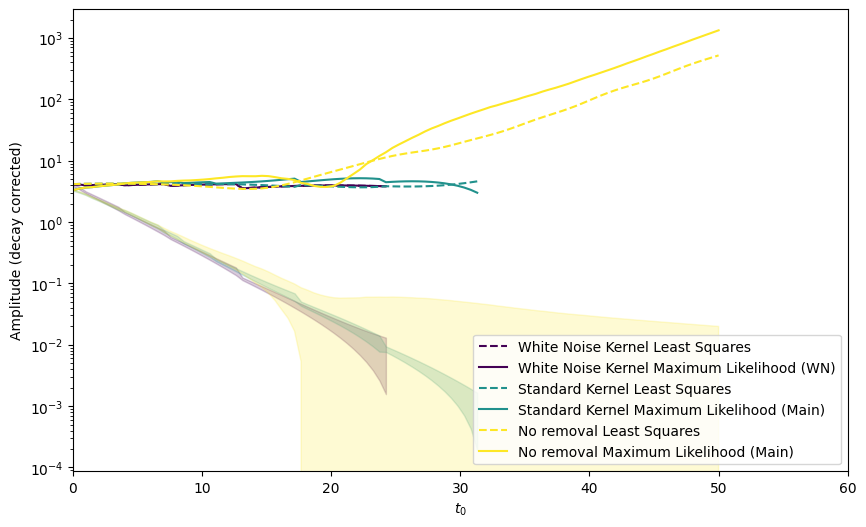

In [ ]:
colours = plt.cm.viridis(np.linspace(0, 3, len(qnm_list)))

fig, ax = plt.subplots(figsize=(10, 6))

view_qnms = [(2, 2, n, 1) for n in np.arange(1, 2)]
view_qnm_indices = [qnm_list.index(qnm) for qnm in view_qnms]

for i, (qnm, index) in enumerate(zip(view_qnms, view_qnm_indices)):
    ax.plot(
        start_times, np.abs(amplitude_dict_ls_s[qnm])* np.exp(-omega_list[index].imag * (start_times)), color=colours[0], ls='--', 
        label="White Noise Kernel Least Squares"
    )
    ax.plot(
        start_times, np.abs(amplitude_dict_ml_s[qnm]) * np.exp(-omega_list[index].imag * (start_times)), color=colours[0], ls='-',
        label="White Noise Kernel Maximum Likelihood (WN)"
    )
    ax.fill_between(np.array(start_times), np.abs(amplitude_dict_ml_s[qnm]) - np.abs(amplitude_std_dev_dict_ml_s[qnm]), 
                    np.abs(amplitude_dict_ml_s[qnm]) + np.abs(amplitude_std_dev_dict_ml_s[qnm]), color=colours[0], alpha=0.2)
    ax.plot(
        start_times, np.abs(amplitude_dict_ls_m[qnm])* np.exp(-omega_list[index].imag * (start_times)), color=colours[1], ls='--', 
        label="Standard Kernel Least Squares"
    )
    ax.plot(
        start_times, np.abs(amplitude_dict_ml_m[qnm])* np.exp(-omega_list[index].imag * (start_times)), color=colours[1], ls='-',
        label="Standard Kernel Maximum Likelihood (Main)"
    )
    ax.fill_between(np.array(start_times), np.abs(amplitude_dict_ml_m[qnm]) - np.abs(amplitude_std_dev_dict_ml_m[qnm]), 
                np.abs(amplitude_dict_ml_m[qnm]) + np.abs(amplitude_std_dev_dict_ml_m[qnm]), color=colours[1], alpha=0.2)
    ax.plot(
        start_times, np.abs(amplitude_array_ls[:, index]) * np.exp(-omega_list[index].imag * (start_times)), color=colours[2], ls='--', 
        label="No removal Least Squares"
    )
    ax.plot(
        start_times, np.abs(amplitude_array_ml[:, index]) * np.exp(-omega_list[index].imag * (start_times)), color=colours[2], ls='-',
        label="No removal Maximum Likelihood (Main)"
    )
    ax.fill_between(np.array(start_times), np.abs(amplitude_array_ml[:, index]) - np.abs(amplitude_st_dev_array_ml[:, index]), 
                    np.abs(amplitude_array_ml[:, index]) + np.abs(amplitude_st_dev_array_ml[:, index]), color=colours[2], alpha=0.2)

    #ax.plot(
    #    start_times,
    #    np.abs(peak_amplitudes[index])
    #    * np.exp(omega_list[index].imag * (start_times)),
    #    linestyle=":",
    #    color=colours[index],
    #)

    # Find the first occurrence of NaN and draw a vertical line
    #nan_index_s = np.where(np.isnan(amplitude_dict_s[qnm]))[0][0]
    #nan_index = np.where(np.isnan(amplitude_dict[qnm]))[0][0]
    #ax.axvline(x=start_times[nan_index_s -1], color=colours[index], linestyle='--')
    #ax.axvline(x=start_times[nan_index - 1], color=colours[index], linestyle='--')
""" 
for i, qnm in enumerate(qnm_list):
    nan_indices_s = np.where(np.isnan(amplitude_dict_s[qnm]))[0]
    nan_indices = np.where(np.isnan(amplitude_dict[qnm]))[0]
    
    if len(nan_indices_s) > 0:
        ax.axvline(x=start_times[nan_indices_s[0]], color=colours[i], ls='-.')
    if len(nan_indices) > 0:
        ax.axvline(x=start_times[nan_indices[0]], color=colours[i], ls='--')
""" 
ax.set_yscale("log")
#ax.set_ylim(9e-1, 1.2e0)
ax.set_xlim(T0, 60)
ax.set_xlabel(r"$t_0$")
ax.set_ylabel("Amplitude (decay corrected)")
ax.legend()
plt.savefig("amplitude_stability.pdf")
plt.show()